In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
ordinal_elastic = pd.read_csv('Ordinal+Elastic.csv')
ordinal_elastic.shape

(2580, 84)

In [3]:
X_ordinal = ordinal_elastic.drop(['SalePrice'], axis=1).values
Y_ordinal = ordinal_elastic.SalePrice.values

In [4]:
X_ordinal.shape

(2580, 83)

In [5]:
len(Y_ordinal)

2580

In [6]:
X_ordinal.shape[1]

83

In [7]:
AR2_Ordinal = []
MAE_Ordinal = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y_ordinal)-1)/(len(Y_ordinal)-X_ordinal.shape[1]-1)
    AR2_Ordinal.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Ordinal.append(mae)

In [8]:
Ordinal = pd.DataFrame({'AR2_Ordinal': AR2_Ordinal, 'MAE_Ordinal': MAE_Ordinal})
Ordinal

,AR2_Ordinal,MAE_Ordinal
0,0.949469,11391.383147
1,0.928132,11874.827297
2,0.937252,12650.641749
3,0.932720,11813.996737
4,0.920360,12458.507155
5,0.945247,11379.774727
6,0.939085,11988.226478
7,0.944419,11605.027679
8,0.935294,12009.921249
9,0.884661,12076.544008


In [9]:
Ordinal.describe()

,AR2_Ordinal,MAE_Ordinal
count,100.000000,100.000000
mean,0.926707,12328.791520
std,0.021975,548.660280
min,0.869309,11054.346006
25%,0.924594,11966.145258
50%,0.935292,12348.317000
75%,0.939628,12659.622369
max,0.951043,13599.915557


In [10]:
ord_elastic_drop1 = pd.read_csv('Ordinal+Elastic_Drop1.csv')
ord_elastic_drop1.shape

(2579, 84)

In [11]:
X_ord_drop1 = ord_elastic_drop1.drop(['SalePrice'], axis=1).values
Y_ord_drop1 = ord_elastic_drop1.SalePrice.values

In [12]:
X_ord_drop1.shape

(2579, 83)

In [13]:
len(Y_ord_drop1)

2579

In [14]:
X_ord_drop1.shape[1]

83

In [15]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ord_drop1,Y_ord_drop1,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y_ord_drop1)-1)/(len(Y_ord_drop1)-X_ord_drop1.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)


In [16]:
OrdinalDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
OrdinalDrop1

,AR2_Drop1,MAE_Drop1
0,0.939836,12672.340404
1,0.938422,12169.419242
2,0.937676,12237.753165
3,0.946793,11811.239924
4,0.940895,12395.237605
5,0.922984,12391.646216
6,0.936481,11724.697426
7,0.942180,11353.047292
8,0.945584,12251.876410
9,0.933479,11742.399104


In [17]:
OrdinalDrop1.describe()

,AR2_Drop1,MAE_Drop1
count,100.000000,100.000000
mean,0.939349,12130.024695
std,0.006544,469.654796
min,0.914303,10889.898363
25%,0.936341,11803.824855
50%,0.939916,12155.589983
75%,0.943930,12404.491614
max,0.951273,13492.575686


In [18]:
ord_elastic_dropIF = pd.read_csv('Ordinal+Elastic_DropIF.csv')
ord_elastic_dropIF.shape

(2568, 84)

In [19]:
X3 = ord_elastic_dropIF.drop(['SalePrice'], axis=1).values
Y3 = ord_elastic_dropIF.SalePrice.values

In [20]:
X3.shape

(2568, 83)

In [21]:
len(Y3)

2568

In [22]:
X3.shape[1]

83

In [23]:
AR2_DropIF = []
MAE_DropIF = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(Y3)-1)/(len(Y3)-X3.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)

In [24]:
OrdinalDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
OrdinalDropIF

,AR2_DropIF,MAE_DropIF
0,0.939042,11777.248245
1,0.943946,11839.979312
2,0.945427,11732.724299
3,0.930330,12089.859606
4,0.949184,11146.846091
5,0.944913,11351.949438
6,0.938679,12434.566631
7,0.948027,11541.655758
8,0.936693,12008.597481
9,0.947660,11838.382246


In [25]:
OrdinalDropIF.describe()

,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000
mean,0.941517,11961.913059
std,0.006302,427.176792
min,0.924167,11145.541206
25%,0.938117,11658.241461
50%,0.941220,11959.160024
75%,0.946219,12187.926956
max,0.956435,13366.370417


In [26]:
box = pd.concat([Ordinal, OrdinalDrop1, OrdinalDropIF], axis=1)
box

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.949469,11391.383147,0.939836,12672.340404,0.939042,11777.248245
1,0.928132,11874.827297,0.938422,12169.419242,0.943946,11839.979312
2,0.937252,12650.641749,0.937676,12237.753165,0.945427,11732.724299
3,0.932720,11813.996737,0.946793,11811.239924,0.930330,12089.859606
4,0.920360,12458.507155,0.940895,12395.237605,0.949184,11146.846091
5,0.945247,11379.774727,0.922984,12391.646216,0.944913,11351.949438
6,0.939085,11988.226478,0.936481,11724.697426,0.938679,12434.566631
7,0.944419,11605.027679,0.942180,11353.047292,0.948027,11541.655758
8,0.935294,12009.921249,0.945584,12251.876410,0.936693,12008.597481
9,0.884661,12076.544008,0.933479,11742.399104,0.947660,11838.382246


In [27]:
box.describe()

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.926707,12328.791520,0.939349,12130.024695,0.941517,11961.913059
std,0.021975,548.660280,0.006544,469.654796,0.006302,427.176792
min,0.869309,11054.346006,0.914303,10889.898363,0.924167,11145.541206
25%,0.924594,11966.145258,0.936341,11803.824855,0.938117,11658.241461
50%,0.935292,12348.317000,0.939916,12155.589983,0.941220,11959.160024
75%,0.939628,12659.622369,0.943930,12404.491614,0.946219,12187.926956
max,0.951043,13599.915557,0.951273,13492.575686,0.956435,13366.370417


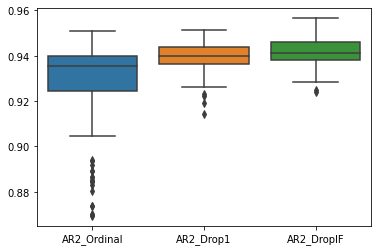

In [28]:
sns.boxplot(data=box[['AR2_Ordinal','AR2_Drop1','AR2_DropIF']]);

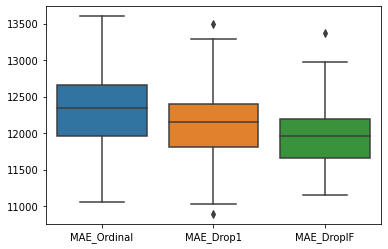

In [29]:
sns.boxplot(data=box[['MAE_Ordinal','MAE_Drop1','MAE_DropIF']]);